# Airbnbs in NYC: An Analysis of Optima for Airbnb Travelers

********
## Table of Contents -


** Note - Click To Access Desired Section 

* [Introduction](#intro)
* [Description of The Dataset](#desc)
* [Analysis of The Datase](#analy)
* [Exploratory Data Analysis](#eda)
* [Potential Data Science](#pds)
* [Conclusion](#conc) 

********

## Introduction <a class="anchor" id="intro"></a>

Completed By Project Group 21 - 

1. Amit Sarvate 
2. Benjamin D. Fedoruk 
3. Lexa Torrance 
4. Ahad Abdul 

The dataset at hand goes by the name 'New York City Airbnb Open Data'. Put simply: the dataset contains records about the many thousands of properties within New York City listed on the Airbnb website in 2019.

The motivation behind the exploration of this particular dataset stems from the re-emergence of international travel as the world transitions back to a more 'normal' way of life post-COVID-19.

Whether it be travelling for business or vacation, New York City has been one of the largest destinations for travel within this world for many decades. The city sees millions of visitors each year, coming for various reasons from all corners of the world. These visitors will most likely need some form of accommodations (hotel, hostel, house) for the duration of their stay.

For this reason, by providing a data-oriented analysis into the listing market of AirBnB properties within NYC, we can bring insight into which particular living accommodations best suit the needs of visitors, regarding both their current circumstances and their purpose: travelling with family or alone, low or high price range, business or pleasure, destination etc.

Going into the analysis of this dataset we have a few inquiries that we would like to explore further using the techniques for data analysis and visualization that we have practiced in class. Some of these questions have been listed:

1. Estimate the earning of each property based on the review number (we are aware of the limitation that not everyone who stays in an Airbnb property leaves a review and therefore, the earnings are more in actuality than they appear in the data set)

2. On average do hosts tend to own property in a particular area of the city or do hosts with multiple listings spread their assets across the city?

3. Which neighbourhoods have the highest propensity to host visitors (based on available listed AirBnB properties within the community), and which have the lowest?

4. How does the average listed property's room type within each of the boroughs change? (Which boroughs have more entire homes for a family available)

5. Does a property's distance from the city centre (downtown Manhattan) have an impact on the daily price rate?


Contributions -

- Amit was responsible for Introduction, Description of The Dataset, Analysis of The Dataset, Conclusion as well as some parts of the visualizations and explanations within the Exploratory Data Analysis section.

- Ben and Lexa were responsible for creating the bulk of the data analysis and visualizations within the exploratory data analysis section. 

- Ben was also responsible for the potential data science section as well as the 'non-technical blog post. 

- Ahad contributed to some of the data visualizations seen in the exploratory data analysis section. 

********

##  Description of The Dataset <a class="anchor" id="desc"></a>

The specific name of the dataset is called 'New York City Airbnb Open Data' and was found on `kaggle.com`, uploaded by 'Dgomonov' in the year 2019. The original data can be sourced to a corporation by the name of 'Inside Airbnb' (`http://insideairbnb.com/about.html`), an organization driven to `"Provide data that quantifies the impact of short-term rentals on housing and residential communities; and also provides a platform to support advocacy for policies to protect our cities from the impacts of short-term rentals."` - as mentioned on their website. 

The dataset was collected from the Airbnb website (`airbnb.com`) including the yearly availability as well as the reviews for each listing. 

The dataset contains a plethora of different types of data associated with each of the properties listed in New York City on the Airbnb website during 2019. For example, there is information about the hosts (owners) of the property, the type of living space the property is in, and much more. Below is a list of the many attributes of this dataset:

-  *id* -- the unique numerical value is given to each specific property to identify it from every other property 
-  *name* -- a short description of the property
-  *host_id* -- the unique numerical value is given to each specific host (owner of the property) to identify them from every other host
-  *host_name* -- the name(s) of the owner(s) of the property 
-  *neighbourhood_group* -- which specific New York borough the property is situated within (Queens, Manhattan, Staten Island, Brooklyn and The Bronx) 
-  *neighbourhood* -- which specific small neighbourhood/community within the borough the property is situated within 
-  *latitude* -- geographic coordinate that specifies the north-south position of a point on the Earth's surface
-  *longitude* -- geographic coordinate that specifies the east-west position of a point on the Earth's surface
-  *room_type* -- what type of space a listed property is (private room, shared room, entire house) 
- *price* -- the price per day rates in USD (US Dollars) that it costs to rent the property 
- *minimum_nights* -- the minimum amount of nights one is allowed to rent out the property for
- *number_of_reviews* -- the total number of reviews made on the property from the entire time the property has been listed on Airbnb
- *last_review* -- the last date the property was given a review 
- *reviews_per_month* -- the number of reviews made on average each month of the property being listed on Airbnb
- *calculated_host_listings_count* -- the total number of listings the host of the property has on AirBnB
- *availability_365* -- how many days the property is available for throughout the year 


Source(s):

1. `Inside Airbnb. Adding data to the debate. (2015). Inside Airbnb. http://insideairbnb.com/about.html`

2. `Dgomonov. (2019). New York City Airbnb Open Data. Kaggle.com. https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data`

3. `NYCdata: Tourism. (n.d.). Www.baruch.cuny.edu. https://www.baruch.cuny.edu/nycdata/tourism/index.html`

********

## Analysis of The Dataset <a class="anchor" id="analy"></a>

In the code below, we are loading the data and creating a data frame to contain the records of the dataset. Additionally, we are importing the necessary modules to read, clean and perform analysis and visualization on the dataset.

In [433]:
%pip install seaborn;

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [434]:
# Importing the neccessary modules into our workbook 
import pandas as pd
import matplotlib.pyplot as plt
import re 
import numpy as np
import scipy as sp

from itertools import cycle, islice

import matplotlib.image as mplImg 
import matplotlib as mpl
import math

import seaborn as sns


# Reading in the dataset and storing it into df 
df = pd.read_csv("ny_air_bnb.csv")

This is a utility for displaying any data point; set of data points; or group by the object of data point sets, within our data. It is included at the start so it can be used to aid in the visualization of our cleaned dataset.

In [435]:
groupByType = type(pd.DataFrame(["null"]).groupby(0)) # not sure if there's any simpler way
def floatRange(start, stop, step, roundNum=2):
    count = int((stop-start)/step)
    stuff = []
    for i in range(count+1):
        stuff.append(round(start+(i*step),roundNum))
    return stuff
class lexaMap:
    nyc = mplImg.imread('mapBackground.png') # I just made this with excel because I couldn't get mpl_toolkits.basemap to import
    minLongitude = 0
    maxLongitude = 1
    minLatitude = 0
    maxLatitude = 1
    tickCount = 5
    xTicks = 0.01
    yTicks = 0.01
    permissablePalettes = [
        ["Blues_r",[0.03137255, 0.18823529, 0.41960784, 1]],
        ["BuGn_r",[0, 0.26666667, 0.10588235, 1]],
        ["BuPu_r",[0.30196078, 0, 0.29411765, 1]],
        ["Greys_r",[0, 0, 0, 1]],
        ["OrRd_r",[0.49803922, 0, 0, 1]],
        ["PuRd_r",[0.40392157, 0, 0.12156863, 1]],
        ["Purples_r",[0.24705882, 0, 0.49019608, 1]],
        ["Wistia_r",[0.98823529, 0.49803922, 0, 1]],
        ["copper",[0, 0, 0, 1]],
        ["mako",[0.04503935, 0.01482344, 0.02092227, 1]],
        ["pink",[0.1178, 0, 0, 1]],
        ["spring",[1, 0, 1, 1]],
        ["summer",[0, 0.5, 0.4, 1]],
        ["Greens_r",[0, 0.26666667, 0.10588235, 1]],
    ]
    defaultPalette = "Blues_r"
    
    @staticmethod
    def latToMeters(lat):
        return lat*110947.2
    
    @staticmethod
    def longToMeters(long):
        return long*85295.232 # approximated from 40 degrees north
    
    @staticmethod
    def meterSize(multiplier):
        width = lexaMap.longToMeters(lexaMap.maxLongitude - lexaMap.minLongitude)
        height = lexaMap.latToMeters(lexaMap.maxLatitude - lexaMap.minLatitude)
        sumOfBoth = width+height
        return multiplier*width/sumOfBoth, multiplier*height/sumOfBoth
    
    @staticmethod
    def initVars(fullDataSet, roundDegree = 1):
        lexaMap.minLongitude = math.floor(fullDataSet.longitude.min()/roundDegree)*roundDegree
        lexaMap.maxLongitude = math.ceil(fullDataSet.longitude.max()/roundDegree)*roundDegree
        lexaMap.minLatitude = math.floor(fullDataSet.latitude.min()/roundDegree)*roundDegree
        lexaMap.maxLatitude = math.ceil(fullDataSet.latitude.max()/roundDegree)*roundDegree
        
        
        lexaMap.xTicks = floatRange(
            lexaMap.minLongitude,
            lexaMap.maxLongitude,
            (lexaMap.maxLongitude - lexaMap.minLongitude)/lexaMap.tickCount
        )
        
        lexaMap.yTicks = floatRange(
            lexaMap.minLatitude,
            lexaMap.maxLatitude,
            (lexaMap.maxLatitude - lexaMap.minLatitude)/lexaMap.tickCount
        )
        
        lexaMap.plotScaleW, lexaMap.plotScaleH = lexaMap.meterSize(30)
        
    @staticmethod
    def ResetSeabornFormatting():
        sns.set_theme(
            context=sns.plotting_context(),
            style=sns.axes_style(),
            palette='deep',
            font='sans-serif',
            font_scale=1,
            color_codes=True,
            rc= {'axes.facecolor': 'white',
                 'axes.edgecolor': 'black',
                 'axes.grid': False,
                 'axes.axisbelow': 'line',
                 'axes.labelcolor': 'black',
                 'figure.facecolor': 'white',
                 'grid.color': '#b0b0b0',
                 'grid.linestyle': '-',
                 'text.color': 'black',
                 'xtick.color': 'black',
                 'ytick.color': 'black',
                 'xtick.direction': 'out',
                 'ytick.direction': 'out',
                 'lines.solid_capstyle': mpl._enums.CapStyle('projecting'),
                 'patch.edgecolor': 'black',
                 'patch.force_edgecolor': False,
                 'image.cmap': 'viridis',
                 'font.family': ['sans-serif'],
                 'font.sans-serif': ['DejaVu Sans',
                                     'Bitstream Vera Sans',
                                     'Computer Modern Sans Serif',
                                     'Lucida Grande',
                                     'Verdana',
                                     'Geneva',
                                     'Lucid',
                                     'Arial',
                                     'Helvetica',
                                     'Avant Garde',
                                     'sans-serif'],
                 'xtick.bottom': True,
                 'xtick.top': False,
                 'ytick.left': True,
                 'ytick.right': False,
                 'axes.spines.left': True,
                 'axes.spines.bottom': True,
                 'axes.spines.right': True,
                 'axes.spines.top': True,
                 'figure.figsize': (6, 3.75) # I had to estimate the default, because I can't find a way to get the figsize at any given point ;-;
                }
        )
        
    @staticmethod
    def createColour(current, maxCount):
        hexchars = "0123456789ABCDEF"
        # shade = 255 - 150*(current/maxCount)
        shade = 150*(current/maxCount)
        return "#"+(str(hexchars[int(shade/16)])+str(hexchars[int(shade%16)]))*2+"FF"
        
    @staticmethod
    def Draw(title, data, sort = None, forcePalette = None, pointSize = None, forceColour = None):
        tooManyGroups = False
        if isinstance(data, pd.DataFrame): # set of entries
            plt.subplots(figsize=(lexaMap.plotScaleW,lexaMap.plotScaleH)) # set scale so it's pretty accurate to real meters
            scatter = sns.scatterplot(data=data, x="longitude", y="latitude", s=10 if pointSize == None else pointSize, palette=lexaMap.defaultPalette if forcePalette == None else forcePalette, color=forceColour, hue=sort, edgecolor="none")
            if sort != None:
                plt.legend(title=sort.replace("_", " ").title())
        elif isinstance(data, pd.Series): # single entry
            data["lexaRandomColumn"] = "X"
            plt.subplots(figsize=(lexaMap.plotScaleW,lexaMap.plotScaleH)) # set scale so it's pretty accurate to real meters
            scatter = sns.scatterplot(data=pd.DataFrame().append(data,ignore_index=True), x="longitude", y="latitude", s=150 if pointSize == None else pointSize, palette=sns.color_palette(["#FF0000"]) if forcePalette == None else forcePalette, color=forceColour, edgecolor="none", marker="X", hue="lexaRandomColumn")
            scatter.text(data.longitude+0.01, data.latitude, "ID: "+str(data.id))
            plt.legend(title=data.loc['name'],labels=["ID: "+str(data.id)])
            
        elif isinstance(data, groupByType): # group by (different colours)
            plt.subplots(figsize=(lexaMap.plotScaleW,lexaMap.plotScaleH)) # set scale so it's pretty accurate to real meters
            scatter = None
            ticker = 0
            colour = None
            lexaOtherSort = None
            realHandleData = []
            if data.ngroups > len(lexaMap.permissablePalettes):
                realHandleData.append(["All",[0, 0, 1, 1]])
                tooManyGroups = True
                sort = None
            for x, group in data:
                if tooManyGroups:
                    palette = None
                    colour = lexaMap.createColour(ticker+1,data.ngroups)
                    group["lexaRandomColumn"] = False
                    lexaOtherSort = "lexaRandomColumn"
                else:
                    palette = lexaMap.permissablePalettes[ticker][0]
                    realHandleData.append([x,lexaMap.permissablePalettes[ticker][1]])
            
                if forcePalette != None:
                    palette = forcePalette
                    colour = None
                if forceColour != None:
                    colour = forceColour
                
                if scatter == None:
                    scatter = sns.scatterplot(data=group, x="longitude", y="latitude", s=10 if pointSize == None else pointSize, palette=palette, hue=sort, color=colour, edgecolor="none", style=lexaOtherSort)
                else:
                    scatter = sns.scatterplot(data=group, x="longitude", y="latitude", s=10 if pointSize == None else pointSize, palette=palette, hue=sort, color=colour, edgecolor="none", ax = scatter)
                ticker = ticker+1
            handles, _ = plt.gca().get_legend_handles_labels()
            newHandles = []
            newLabels = []
            index = 0
            for hData in realHandleData:
                # newHandles.append(mpl.collections.PathCollection([mpl.path.Path.circle(radius=0.5)]))
                newHandles.append(handles[index])
                newHandles[index].set_ec([hData[1]])
                newHandles[index].set_fc([hData[1]])
                newLabels.append(hData[0])
                index = index+1
            if tooManyGroups:
                plt.legend(title="Groups",handles=newHandles,labels=newLabels)
            else:
                plt.legend(title="Group -> "+sort.replace("_", " ").title(),handles=newHandles,labels=newLabels)
        else:
            print("lexaMap.Draw - Unknown data type given:",str(type(data)))
            return
        scatter.set_xlim(lexaMap.minLongitude, lexaMap.maxLongitude)
        scatter.set_xticks(lexaMap.xTicks)
        scatter.set_ylim(lexaMap.minLatitude, lexaMap.maxLatitude)
        scatter.set_yticks(lexaMap.yTicks)
        scatter.imshow(lexaMap.nyc, aspect="auto", extent=(lexaMap.minLongitude, lexaMap.maxLongitude, lexaMap.minLatitude, lexaMap.maxLatitude), zorder=-1)
        plt.title(title)
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(True)
        plt.show()
        lexaMap.ResetSeabornFormatting() # reset to default scale
lexaMap.initVars(df, 0.1)


####################
##   HOW TO USE   ##
####################
## lexaMap.Draw(
##     title,                 - The title of the map - A string
##     data,                  - The items to print - A single row (series), or multiple rows (data frame), or groups of rows (group by object)
##     sort = None,           - The column to sort by, doesn't work for large groupby objects - A string
##     forcePalette = None,   - Force the palette to use - A string
##     forceColour = None,    - Force the colour to use - A string
##     pointSize = None       - Force the size of the points - An integer
## )
## 
## Creates a map of any given set of data in this project
## It can be used to print a single listing, by passing that listing.
##     E.G. lexaMap.Draw(title="Most Expensive Listing", data=df_stripped.sort_values("price").loc[0])
## 
## It can be used to print all the listings, or a sliced set, sorted by any column, by passing a dataframe of listings.
##     E.G. lexaMap.Draw(title="First 100 Listings", data=df_stripped.head(100), sort="number_of_reviews")
##     E.G. lexaMap.Draw(title="All listings", data=df_stripped, sort="room_type", forcePalette="pink")
## 
## It can be used to print groups of sets of listings, by passing a groupby of dataframes of listings
##     E.G. lexaMap.Draw(title="Neighbourhoods by group", data=df_stripped.groupby("neighbourhood_group"), sort="neighbourhood")
## 

# Usage examples: (uncomment to see)
# lexaMap.Draw(title="Most Expensive Listing", data=df_stripped.sort_values("price").loc[0])
# lexaMap.Draw(title="First 100 Listings", data=df_stripped.head(100), sort="number_of_reviews")
# lexaMap.Draw(title="All listings", data=df_stripped, sort="room_type", forcePalette="pink")
# lexaMap.Draw(title="Neighbourhoods by group", data=df_stripped.groupby("neighbourhood_group"), sort="neighbourhood")

This is a list of colour codes that depict that the different boroughs within the city. We have included it within this section as it is part of our preliminary setup before creating visualizations with our cleaned dataset. 

In [436]:
borough_palette = {'Bronx': 'b', 'Brooklyn': 'r', 'Manhattan': 'g', 'Staten Island': 'm', 'Queens': 'c'}

#### Before Cleaning The Dataset 

The code below gives the reader a quick view of some information about the dataset before cleaning. Make note of the number of non-null records within the `last_review` and `reviews_per_month` columns of the dataset. Also, make note of `host_id`. Given the dataset contains 48895 records originally, we can deduce that there are around 10,000 records containing null values, which we will want to clean.

In [437]:
# Printing the number of records within the dataset 
print(f'There are originally a total of {df.shape[0]} total records within this dataset\n\n')

# This is the information 
print(df.info())

There are originally a total of 48895 total records within this dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews  

#### Cleaning the Dataset 

During this stage, we are cleaning the dataset to allow us to more easily analyze the information within. 

##### 1. Dropping Records With Null Values 

We will be removing any records that contain null values as records with null values make it harder for us as the analysts to come to conclusions. *Make note:* by having to remove records within the dataset containing an attribute with a null value will lead to a loss of potentially a lot of valuable information and therefore we acknowledge from this limitation that any analysis we make might be skewed from the actual answer due to Airbnb cords having to be removed.

In [438]:
# 1. Cleaning the dataset 
df = df.dropna()

##### 2. Checking for and dropping duplicate records 

We will then determine if there are any duplicate records that could potentially cause inaccuracies when creating visualizations such as count plots (ex - having the same record's attribute counted twice) - there were no duplicate records and this was communicated in the code  

In [439]:
# 2. Determining whether there are duplicate records 
dup_count = len(df) - len(df.drop_duplicates())
print(f'There were {dup_count} duplicates in df')

df = df.drop_duplicates()

There were 0 duplicates in df


##### 3. Text normalization for `name` field 

We will then transform the `name` field containing brief descriptions of each property to lowercase to make the text more readable 

In [440]:
# 3. Text normalization for the name column (improving readability) 
df['name'] = df['name'].apply(lambda x : x.lower()) # converting the names to lowercase 

##### 4. Preprocessing Data (Creating new columns within the dataset) and Converting to `last_review` to DateTime 

Finally, we will convert the date of `last_reviewed` from string to DateTime. We will then separate the month and year of the last reviewed date into their respective columns as we believe we will be needing these metrics for further analysis within the exploratory data analysis of this dataset. 

We will also be calculating the approximate gross earnings and monthly earnings of each property given the number of reviews left and the daily price rate of renting the property.

***Note: these are only estimates of the gross and monthly earnings since not everybody who stays at an Airbnb ends up giving their room a review - therefore the earnings of the properties are possibly much higher than they appear within the dataset*** 

In [441]:
#4. Preprocess Date Column inot Month and Year columns 
df['last_review'] = pd.to_datetime(df['last_review'],errors='coerce')

df['last_review_month'] = df['last_review'].dt.month
df['last_review_year'] = df['last_review'].dt.year

# 5. Creating a columns with gross earnings and monthly earnings (based on number_of_reviews)
df['gross_earnings'] = df['price'] * df['number_of_reviews']
df['monthly_earnings'] = df['price'] * df['reviews_per_month']

#### Results of Cleaning The Dataset

As can be seen, we have lost approximately 10,000 records due to dropping the records containing null values. By doing this we may have lost some very valuable information and therefore this speaks about the quality of the dataset. In particular, after cleaning the dataset it appears to be the `last_review` and `number_of_reviews` have been the bottleneck that caused the majority of records to drop during the cleaning process, meaning the quality of these two columns, in particular, were subpar. Given all other columns (except for `host_id` as well), all records contained non-null values for those columns and therefore the rest of the dataset was really good! 

In [442]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  nu

This is how the dataset looks after cleaning and preprocessing has been completed. As can be seen there is no sign of duplicate records, no records containing null fields as well as text normalization within the `name` attribute allowing for better visual display of this information! 

In [443]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year,gross_earnings,monthly_earnings
0,2539,clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,10,2018,1341,31.29
1,2595,skylit midtown castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5,2019,10125,85.50
3,3831,cozy entire floor of brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,7,2019,24030,412.96
4,5022,entire apt: spacious studio/loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,11,2018,720,8.00
5,5099,large cozy 1 br apartment in midtown east,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,6,2019,14800,118.00


The data set is copied to another variable, with stripped outliers, as these will make visualization (especially visualization with gradiented scatter plot maps) very difficult

In [444]:
df_stripped = df[np.abs(sp.stats.zscore(df["price"])) < 3]
print(df_stripped.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38509 entries, 0 to 48852
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38509 non-null  int64         
 1   name                            38509 non-null  object        
 2   host_id                         38509 non-null  int64         
 3   host_name                       38509 non-null  object        
 4   neighbourhood_group             38509 non-null  object        
 5   neighbourhood                   38509 non-null  object        
 6   latitude                        38509 non-null  float64       
 7   longitude                       38509 non-null  float64       
 8   room_type                       38509 non-null  object        
 9   price                           38509 non-null  int64         
 10  minimum_nights                  38509 non-null  int64         
 11  nu

********

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

Now that we have cleaned and preprocessed our dataset, there are a lot of different types of analysis that we can perform on the data to find out information about the Airbnb listing market within New York City. In particular, we would like to expand upon a few subtopics to provide insightful information about the market including - 

[comment]: <> (Analysing the options for visitors)
1. Taking a look at the market and providing insight about the best available options to cater to a wide variety of visitors based on their circumstances and reasonings behind coming to NYC  

[comment]: <> (Finance and investment analysis)
2. An analysis into the financial aspect of owning an Airbnb (Focusing on income across the city as well as price variations across neighbourhoods) as well as providing potential investor insight into the best locations to build or host Airbnb 

We will also briefly examine several other key analyses using these data.

### An Analysis into the Dataset from a Consumer's Perspective

#### A Look into the Availability of Accommodation Across The City 

According to Baruch College, New York City welcomed an estimated 65.1 million visitors within the year 2018 alone (Baruch College, n.d.). Visitors from all corners of the world come to New York City for a multitude of different reasons whether it be for business, vacation, or to visit friends and family. Keeping this in mind as well as the fact that visitors might be travelling alone or with a family, most people's needs for accommodation will vary. 

A count plot displaying the number of available Airbnbs per borough per room type has been graphed below.

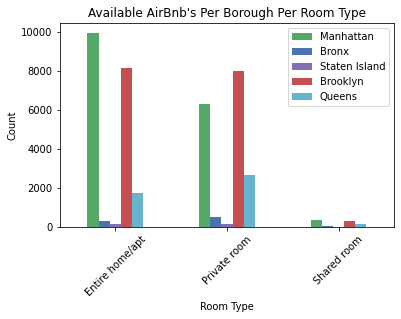

In [445]:
A = df[df['neighbourhood_group'] == 'Manhattan'].groupby('room_type').count()['id']
B = df[df['neighbourhood_group'] == 'Bronx'].groupby('room_type').count()['id']
C = df[df['neighbourhood_group'] == 'Staten Island'].groupby('room_type').count()['id']
D = df[df['neighbourhood_group'] == 'Brooklyn'].groupby('room_type').count()['id']
E = df[df['neighbourhood_group'] == 'Queens'].groupby('room_type').count()['id']

df_subbar = pd.DataFrame(np.c_[A,B,C,D,E], index=np.unique(df['room_type']))

my_colors = list(islice(cycle(['g', 'b', 'm', 'r', 'c']), None, len(df)))

df_subbar.plot.bar(color=my_colors);
plt.legend(labels=["Manhattan","Bronx", "Staten Island", "Brooklyn", "Queens"])

plt.xticks(rotation = 45);
plt.title("Available AirBnb's Per Borough Per Room Type")
plt.xlabel("Room Type")
plt.ylabel("Count");

As seen, the majority of rooms available on the New York City Airbnb market are either entire homes/apartments or private rooms meant for a single person. There are not as many shared rooms available Airbnb market. 

The graph also illustrates in which borough these room types are available. As can be seen from the graph, the most prevalent type of accommodation comes in the form of an entire home/apartment within Manhattan with there being close to 10,000 different options available for the consumer/visitor. 

The next most prevalent type of accommodation is entire homes/apartments as well as (to a lesser extent) private rooms within Brooklyn with around 8000 properties in each category respectively. 

An entire home/apartment more than likely has enough area to host an entire family and therefore there are a lot of options for families when coming to New York City to stay within one of the many homes/apartments listed within Manhattan or Brooklyn. On the other hand, if one were to come to New York City as a single person, their best bet would be to rent a private room within either Brooklyn or Manhattan as these boroughs have the greatest number of options.  

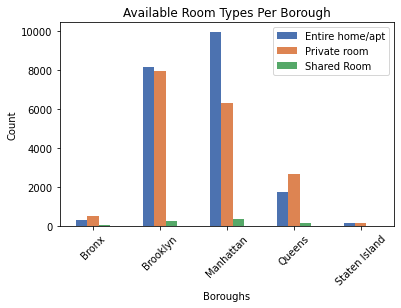

In [446]:
A = df[df['room_type'] == 'Entire home/apt'].groupby("neighbourhood_group").count()['id']
B = df[df['room_type'] == 'Private room'].groupby("neighbourhood_group").count()['id']
C = df[df['room_type'] == 'Shared room'].groupby("neighbourhood_group").count()['id']

df_subbar = pd.DataFrame(np.c_[A,B,C], index=np.unique(df['neighbourhood_group']))
df_subbar.plot.bar();

plt.legend(labels=['Entire home/apt', 'Private room', 'Shared Room'])


plt.xticks(rotation = 45);
plt.title("Available Room Types Per Borough")
plt.xlabel("Boroughs")
plt.ylabel("Count");

Similarly, this graph illustrates the different counts of each type of accommodation within each of the 5 different boroughs. This graph was created the with intent to expand upon our first graph to give way to the notion that not all boroughs have the same number of available options. 

The Bronx and Staten Island do not have as many available options as they show consistently the lowest count of each room type, giving way to the notion that instead of visitors and tourists, these boroughs are more than likely to host local residences and therefore might not have the most amount of attractions that those coming to visit NYC would be most likely interested in. 

Instead, most Airbnbs are located within the Manhattan and Brooklyn areas meaning that they are more likely to see tourists as well as visitors and might be areas where visitors incoming to NYC could find a lot of the amenities most sought out to visit while in NYC. 

Whether it be for business or vacation, the Manhattan and Brooklyn areas seem to host the highest proportion of NYC visitors, and for this reason, a pie chart is an optimal way to describe the share of available options amongst the different boroughs: 

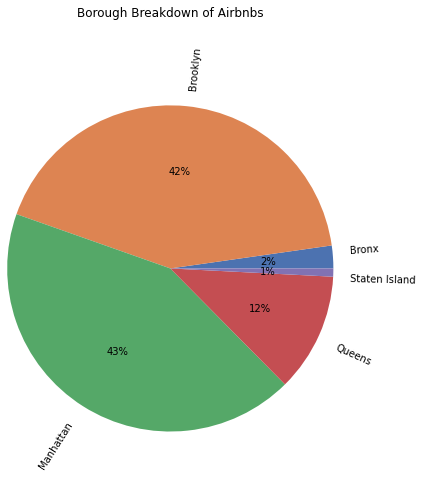

In [447]:
plt.pie(x=df.groupby('neighbourhood_group').count()['id'].values, labels=df.groupby("neighbourhood_group").count()['id'].index, autopct='%.0f%%', radius=2, rotatelabels=True)
plt.title("Borough Breakdown of Airbnbs", pad=150);

This pie chart shows that from the total percentage of all available options, both the Brooklyn and Manhattan areas combine to host 85% of all Airbnbs on the listing market, validating the graphs above and the idea that the Manhattan and Brooklyn areas contain the greatest quantity of options for accommodations within NYC 

#### Viewing The Data from a Visitor's Cost Perspective 

When visiting New York City, accommodation can be expensive. It is important to be mindful of your budget and therefore the `comm_price_avg` dataframe was created to have a look into the average cost of airbnbs within each of the neighbourhoods of each of the boroughs of New York City.

In [448]:
comm_price_avg = pd.DataFrame(df.groupby(['neighbourhood_group','neighbourhood']).mean()['price']).round(2)
pd.set_option('display.max_rows', comm_price_avg.shape[0]+1)

comm_price_avg

price
neighbourhood_group neighbourhood                     
Bronx               Allerton                     90.59
                    Baychester                   78.00
                    Belmont                      79.45
                    Bronxdale                    51.88
                    Castle Hill                  74.00
                    City Island                  94.27
                    Claremont Village            68.94
                    Clason Point                101.33
                    Co-op City                   77.50
                    Concourse                    77.95
                    Concourse Village            73.17
                    East Morrisania              85.00
                    Eastchester                 124.90
                    Edenwald                     84.56
                    Fieldston                    75.08
                    Fordham                      62.06
                    Highbridge                   72.05
                    Hunts Point                  51.81
                    Kingsbridge                  78.20
                    Longwood                     74.49
                    Melrose                      82.71
                    Morris Heights               62.75
                    Morris Park                  72.00
                    Morrisania                   75.43
                    Mott Haven                   80.72
                    Mount Eden                   60.60
                    Mount Hope                   80.28
                    North Riverdale              59.17
                    Norwood                      68.12
                    Olinville                    53.00
                    Parkchester                  68.56
                    Pelham Bay                  113.46
                    Pelham Gardens               89.04
                    Port Morris                  70.47
                    Riverdale                   226.86
                    Schuylerville                69.23
                    Soundview                    52.85
                    Spuyten Duyvil              154.75
                    Throgs Neck                  94.52
                    Tremont                      49.90
                    Unionport                   162.00
                    University Heights           67.71
                    Van Nest                     58.56
                    Wakefield                    75.71
                    West Farms                  122.00
                    Westchester Square          127.44
                    Williamsbridge              104.41
                    Woodlawn                     60.09
Brooklyn            Bath Beach                   84.80
                    Bay Ridge                   105.37
                    Bedford-Stuyvesant          105.96
                    Bensonhurst                  77.21
                    Bergen Beach                105.75
                    Boerum Hill                 167.76
                    Borough Park                 64.40
                    Brighton Beach               87.29
                    Brooklyn Heights            201.96
                    Brownsville                  76.05
                    Bushwick                     85.13
                    Canarsie                     96.24
                    Carroll Gardens             178.90
                    Clinton Hill                176.16
                    Cobble Hill                 193.43
                    Columbia St                 133.57
                    Coney Island                125.60
                    Crown Heights               111.63
                    Cypress Hills               130.97
                    DUMBO                       178.38
                    Downtown Brooklyn           152.28
                    Dyker Heights                95.09
                    East Flatbush               106.66
                    East New York 

The following are graphs showing the average prices of each neighbourhood for comparison within a given borough. The mindset behind implementing these graphs was to give the viewer a look at the price variation amongst the various different communities within each borough. 

There is a lot of information that can be deduced by looking at the visualization below, however for visitors coming to NYC, looking to rent accommodation at a price that fits within their budget: these graphs will allow one to gauge the most efficient price for their stay.

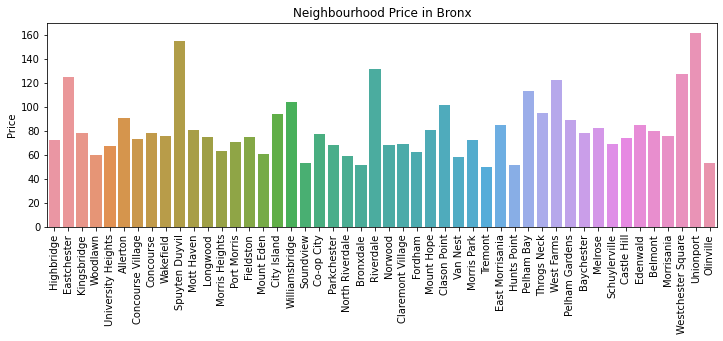

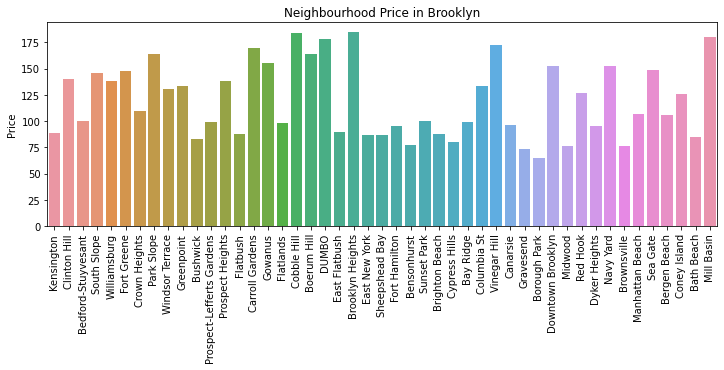

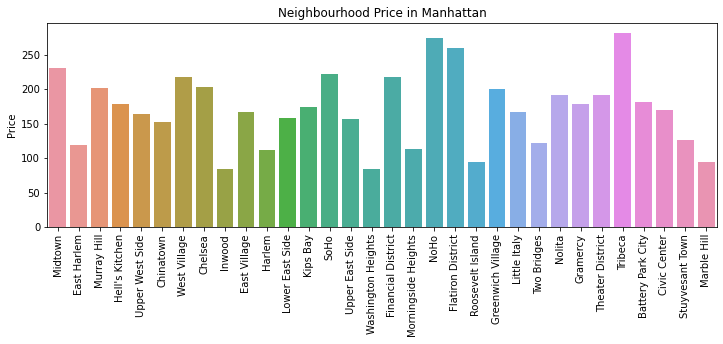

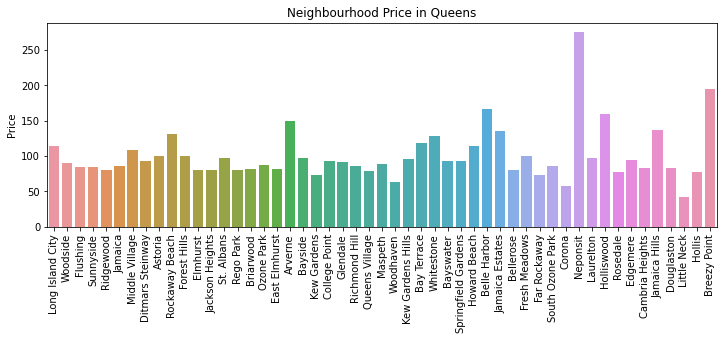

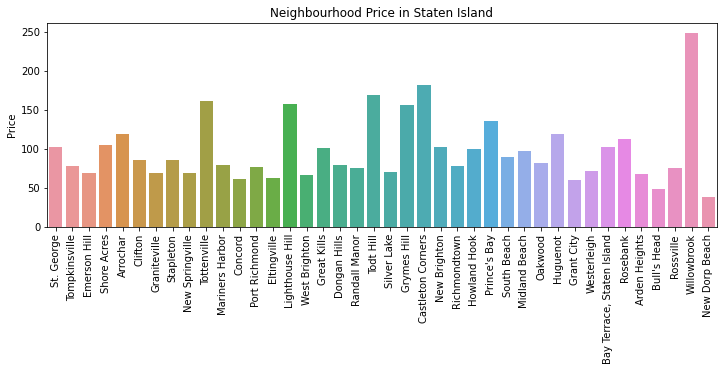

In [449]:
groups = df_stripped.groupby("neighbourhood_group")
for neighbourhood_group, groupinfo in groups:
    plt.subplots(figsize=(12, 3.75))
    bar = sns.barplot(x="neighbourhood", y="price", data=groupinfo, ci=None)
    plt.xlabel("")
    plt.ylabel("Price")
    plt.title("Neighbourhood Price in "+neighbourhood_group)
    for label in bar.get_xticklabels():
        label.set_rotation(90)
    plt.show()
    lexaMap.ResetSeabornFormatting() # reset to default scale

After looking at these graphs please be aware of the limitation in which the averages amongst the different properties within each community has been taken and therefore if a community only has a few (or maybe even one) property listed within a certain community this can vastly skew the average when comparing price averages amongst communities.

However, most communities within Manhattan are much more costly than those within the other boroughs. For visitors on a budget, for example, a community worth looking into for accommodation would be Inwood, Marble Hill, or Washington Heights. These communities on average boast the lowest Airbnb listing prices (about 100 dollars/day) and can save travellers looking to cut costs.

Taking into considering the limitations of taking an average of price, based upon these graphs, one can expect Riverdale in Bronx (about 450 dollars/day), Sea Gate in Brooklyn (about 500 dollars/day), Tribeca in Manhattan (about 500 dollars/day) and Fort Wadsworth in Staten Island (about 800 dollars/day) to be areas with the most expensive average daily rate for Airbnb property rentals.

#### Mapping Data to Provide Further Insight into The Data

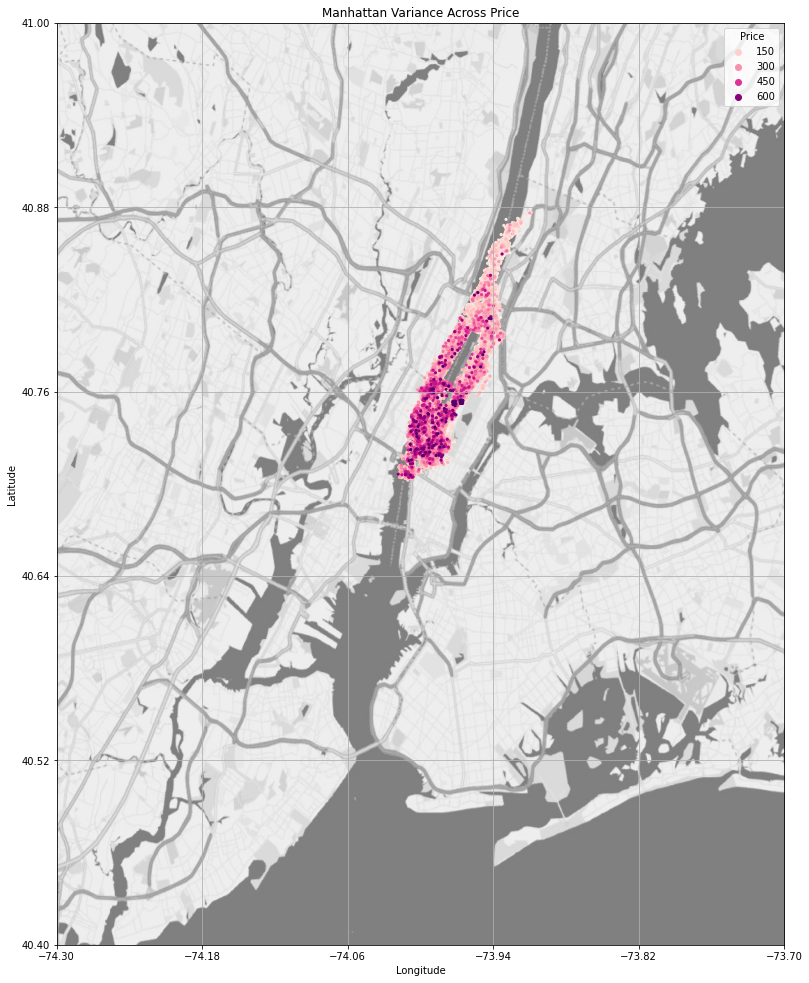

In [450]:
lexaMap.Draw(title="Manhattan Variance Across Price", data=df_stripped[df_stripped.neighbourhood_group == "Manhattan"].sort_values("price"), sort="price", forcePalette="RdPu")

This graph shows the price variance across Manhattan put on a map format. As can be seen, as one travels lower into downtown and midtown Manhattan, the prices for accommodation become much more costly with most properties costing anywhere from 300 to 600+ dollars per night.

The area is quite rich financially with the area being home to many of the worlds most successful companies as well as home to the financial district and world trade centre. There are also a lot of attractions in lower Manhattan and therefore the prices can be attribute to these few reasons. 

Make note that as one travels more north within Manhattan the prices usually become chapter at around 150 to 300 dollars a night for an airbnb. For those travelers on a budget but wanting to stay close to downtown Manhattan, upper (northern Manhattan) is a great place to look into getting a rental airbnb as one would be still relatively close to all the action within lower Manhattan, however this comes at the cost of possible increased travel times.

During analysis, we found problems with having the data points on the map overlap one another. One of the ways we combatted this to provide a useful and insightful visualization was to trial and error with the size of the data point to allow the reader to better see the variation in price while still being able to see the individual data points. As a result we have set the size of the data points to be 5 by default. 

In [ ]:
lexaMap.Draw(title="Airbnb's Across NYC's 5 Boroughs", data=df_stripped.groupby("neighbourhood_group"), sort="neighbourhood")

This dataset shows the availability of airbnb's across the city from a geographical point of view, by mapping the longitude and latitude of the individual airbnbs on the graph and colour coding the airbnbs by the respective boroughs they reside in. 

As illustrated, the Manhattan and Brooklyn areas appear to be the most solid in terms of colour and therefore this further makes way to the notion that most available options are within these two boroughs. The most scattered and least dense is of course Staten Island which has the least number of available options for travelers looking for accommodation. 

In [ ]:
lexaMap.Draw(title="Airbnb's Across New York City", data=df_stripped, pointSize=0.5, forceColour="blue")

This is another graph that shows the density of available airbnbs across the city. Make note of the most and least dense areas. This graph differs to the one above because one cannot differentiate between the different boroughs of this map. However as a reader, one is able to better visualise the differences in density across the city. 

The series of graphs produced using the code redraw the locations of various stats right on the NYC map including where the most expensive airbnb is geographically located.

#### Further Analysis Into Average Prices Across The Boroughs 

In the following two visualizations, we will display the average room price for each neighbourhood (within the 5 boroughs). The first visualization is a violin plot, which graphs a kernel density estimate (KDE) along with a box-and-whisker-style plot. The KDE visualizes the density of the data within the quartiles, while the box-and-whisker plot shows the median, first- and third-quartile, and the mean (denoted with a dot), as well as the outliers present in the data. 

The second visualization is a swarm plot. This plot does not include the data specifics -- it does not display the interquartile range, the median, or the mean. However, it does allow us to see the actual amount, with markers for each neighbourhood's average room price. It provides a sense of validation for the data, as a violin plot may appear accurate, but may have very sparse data, meaning that the violin plot is overfitted to the small amount of data. In our case, however, the swarm plot demonstrates that the violin plot fits well, and that there is enough data to properly use the metrics provided therein.

In [ ]:
df_nbh = df.groupby(['neighbourhood_group', 'neighbourhood']).agg({'price': ['mean']})
df_nbh.columns = ['avg_price']
df_nbh = df_nbh.reset_index()
df_nbh

plt.figure(figsize=(12,6)) 

sns.violinplot(data=df_nbh, x='neighbourhood_group', y='avg_price', palette=borough_palette)
plt.xlabel("Borough")
plt.ylabel("Average Room Price")
plt.title("Average Room Price Within Neighbourhood For Each Borough");

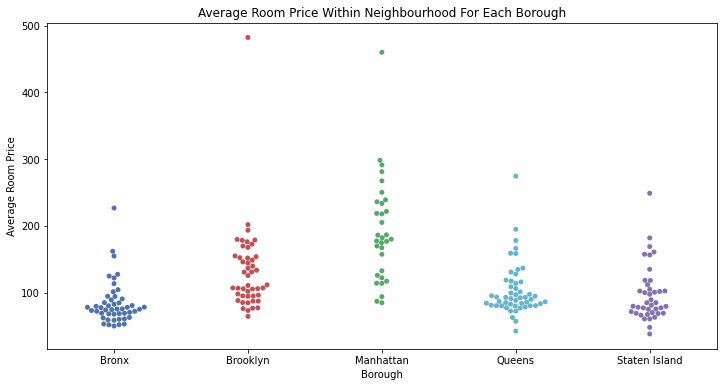

In [44]:
plt.figure(figsize=(12,6)) 
sns.swarmplot(data=df_nbh, x='neighbourhood_group', y='avg_price', palette=borough_palette, s=5, edgecolor="none")
plt.xlabel("Borough")
plt.ylabel("Average Room Price")
plt.title("Average Room Price Within Neighbourhood For Each Borough");

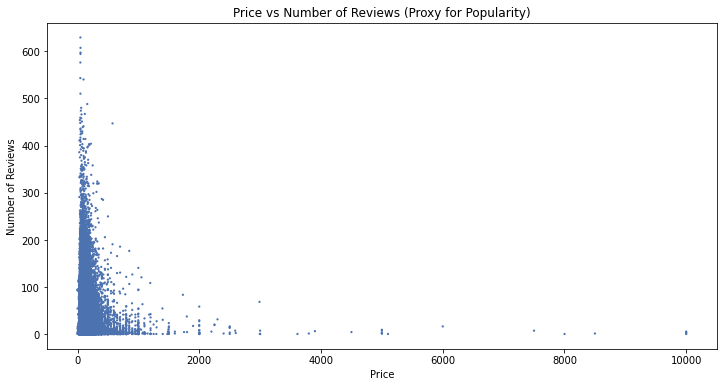

In [45]:
plt.figure(figsize=(12,6)) 

sns.scatterplot(data=df, x="price", y="number_of_reviews", s=5, edgecolor="none")
plt.title("Price vs Number of Reviews (Proxy for Popularity)")
plt.xlabel("Price")
plt.ylabel("Number of Reviews");

#### Other Interesting Visualizations 

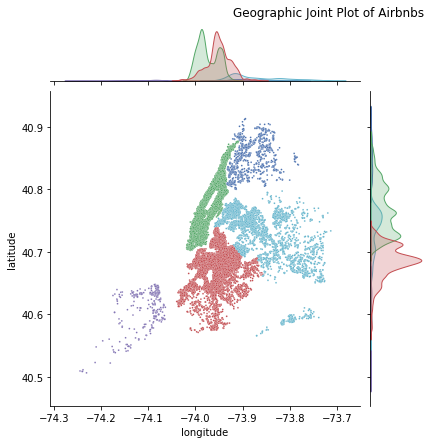

In [46]:
sns.jointplot(data=df, x="longitude", y="latitude", hue="neighbourhood_group", palette=borough_palette, s=3, legend=None)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Joint Plot of Airbnbs", pad=75, loc="right");

### Providing Insight into the Incomes of Airbnb's Across New York City 


The tables below illustrate the average monthly and gross incomes made by airbnbs within each of the boroughs. As can be seen, due to the limitation of not all customers leaving reviews and thus number of people who actually stayed at the property is much lower than it is and therefore calculations of monthly and gross incomes would be slightly skewed. On top of this taking an average can also make the gross earnings appear higher than they are if a borough does not have as many properties listed. Taking into consideration these challenges and limitations, here are the results. 

In [47]:
# Pivot Table Showing Gross Incomes Amongst Boroughs 
avg_gross_inc_table = pd.pivot_table(df, index="neighbourhood_group", values="gross_earnings", aggfunc="mean")

avg_gross_inc_table.rename(columns={'gross_earnings': 'average gross earnings'}, inplace=True) 
avg_gross_inc_table

,average gross earnings
neighbourhood_group,
Bronx,2489.844571
Brooklyn,3577.997628
Manhattan,4395.864629
Queens,2973.945976
Staten Island,3019.356688


In [48]:
# Pivot Table Showing Gross Incomes Amongst Boroughs 
avg_month_inc_table = pd.pivot_table(df, index="neighbourhood_group", values="monthly_earnings", aggfunc="mean")
avg_month_inc_table.rename(columns={'monthly_earnings': 'average monthly earnings'}, inplace=True) 

avg_month_inc_table

,average monthly earnings
neighbourhood_group,
Bronx,145.183737
Brooklyn,151.911936
Manhattan,224.882732
Queens,171.223158
Staten Island,157.132420


As can be seen, the average monthly and gross earnings surprisingly differ only by a little. On average Manhattan's Airbnbs make the most amount of income (gross and monthly wise)  

*******

## Potential Data Science <a class="anchor" id="pds"></a>

There are numerous avenues for future analyses. Proper analysis of these data should include several techniques of data science, clustering and various modelling techniques. If additional time data was given, specifically the date of establishment of each unit, we could continue to analyze whether established units provide higher profit for prospective Airbnb renters, or if the units in a certain neighbourhood often trade hands (which may indicate that the market in that neighbourhood is unstable, raising caution to potential buyers). 

With time-of-establishment data, we could determine what areas are well-established, and what areas are rising in popularity. This would be critical for a buyer to know if seeking to purchase an Airbnb property. 

Various modelling techniques should be employed on these data. We think that clustering would be an extremely advantageous tool to apply to this analysis. For instance, using k-means clustering would allow for unsupervised learning. We could also train a model using k-nearest neighbours or a support vector machine to determine what the optimal location would be to buy/establish a new Airbnb property in New York City. This model could be applied to other large cities with a similar layout to New York City, such as Toronto or Los Angeles. We believe that a k-nearest neighbours model of classification would be ideal to use when examining a specific densely-packed region (such as Manhattan), as it tends to work better on larger datasets with few outliers. However, if we were analyzing the entirety of New York City, it may be advantageous to employ a support vector machine model, as it would deal with outliers such as Staten Island, where Airbnb density is drastically different from packed areas such as Manhattan or Brooklyn.

Additionally, a random forest classifier may be an optimal method to model a large number of categorical labels present within the dataset (e.g. `room_type`, `neighbourhood_group`). 

Finally, it appears that the graph displayed herein, depicting a scatter plot of the price of an Airbnb against its number of reviews, approaches a rational function. It may be advantageous to determine the specific parameters for this curve (potentially using a logit curve), and then determine the inflection point. This would indicate two different classes of Airbnb pricing, which may provide a potential optimal price that Airbnb owners should charge to attract the greatest number of customers. This could be done using the `sklearn` and `sympy` modules in Python.

*******

## Conclusion <a class="anchor" id="conc"></a>

### Reflection 

There were a lot of things learned during the duration of the report. Many insights were able to be made because of the power of data visualization and being able to manipulate the attribute columns within the dataset to create pivot tables and new data frames to answer various questions. 

We learned a lot of important lessons while cleaning our data. In particular, we learned about the importance of having quality data. Our dataset for the most part contained very good quality data which helped us derive many conclusions. However, we did have the bottleneck of having to drop approximately 10,000 records due to the presence of a lot of null `last_reviewed` fields within the records of data, which could have caused us to delete a lot of information right from the get-go. 

A lot of learning in terms of the available options for the consumer within the NYC Airbnb market allowed us to provide insightful suggestions for accommodations to visitors coming to New York City for a visit based on their travelling situations, budget as well as purpose in travel. 

A lot of financial information was able to be derived through calculations of the `gross_earnings` and `monthly_earnings` provided. 

In terms of limitations, having not every consumer leave a review skewed the total number of visitors we used in the calculation to get to monthly and gross earnings and therefore we have to understand that the actual earnings are higher than they appear.

Additionally, while taking averages of the various price rates within each community, it is worth mentioning that average prices can appear very high because only a small number of properties reside within the community, leading to sometimes inaccurate calculations of the actual mean price. 

### Refinement 

To improve the project we would seek out data that contains a better `last_reviewed` attribute or entirely remove the column from the dataset to retain the maximum amount of records and therefore information to make even more accurate predictions. 

In terms of modelling - this dataset has an incredible ability to have been applied to prediction modelling to predict where future visitors should rent out Airbnbs based upon their circumstances (single, alone, disabled etc), and their purpose for the trip to NYC (business, vacation etc) 